In [1]:
%matplotlib inline

In [2]:
import os
DATADIR = os.path.join(os.getcwd())
print(os.path.exists(DATADIR))
import csv
from collections import defaultdict
import gzip
import pickle
import networkx as nx
from IPython.display import Image, clear_output
import warnings
warnings.simplefilter('ignore')

True


### Create a MultiGraph of 'To'/'From' Relationships

In [3]:
import re
re_me = re.compile(r"""Brian\.Chapman@utah\.edu""",re.I)

### [``MultiDiGraph``](https://networkx.github.io/documentation/latest/reference/classes/multidigraph.html)

We're going to put the e-mail information into a NetworkX ``MultiDiGraph``. The ``MultiDiGraph`` allows us to have multiple edges between nodes.

In this graph nodes will be senders and receivers and edges will be particular messages.

In [24]:
my_email = nx.MultiDiGraph()

with open(os.path.join(DATADIR,
                            "my_emails_2017.txt"),'rt') as f:
    reader = csv.reader( f,delimiter="\t" )

    for row in reader:
        try:
            my_email.add_edge(row[0].lower(),row[1].lower())
        except Exception as error:
            print(error)
            pass


## How large is this graph?


In [25]:
my_email.number_of_nodes(), my_email.number_of_edges()

(4392, 41817)

### Connected Subgraphs

Graphs can consist of distinct components that are disconnected from each other [connected_component_subgraphs](https://networkx.github.io/documentation/latest/reference/generated/networkx.algorithms.components.connected.connected_component_subgraphs.html?highlight=connected_component_subgraphs) creates distinct graphs for each connected component and returns them in a list.

We also use the [``sort``](https://docs.python.org/3/library/stdtypes.html#list.sort) method of the list to sort the subgraphs by the number of nodes in each graph.

>*key* specifies a function of one argument that is used to extract a comparison key from each list element (for example, key=str.lower). The key corresponding to each item in the list is calculated once and then used for the entire sorting process. The default value of None means that list items are sorted directly without calculating a separate key value.

* We use list comprehension to keep the subgraphs that have more than two nodes.
* We use an [anonymous lambda function](https://docs.python.org/3/howto/functional.html#small-functions-and-the-lambda-expression) to do the sorting.

### With whom are my most frequent e-mail exchanges?

In [28]:
main_email = my_email
edges = main_email.edges()
edge_from_count = {}
edge_to_count = {}
mail_count_limit = 35
for e in main_email.edges(data=False):
    if e[0] == "brian.chapman@utah.edu":
        edge_from_count[e] = main_email.number_of_edges(e[0],e[1])
    if e[1] == "brian.chapman@utah.edu":
        edge_to_count[e] = main_email.number_of_edges(e[0],e[1])

    

In [30]:
main_email.number_of_edges("wendy.chapman@utah.edu","brian.chapman@utah.edu")

792

In [33]:
efc = list(edge_from_count.items())
efc.sort(key=lambda x:x[1], reverse=True)
etc = list(edge_to_count.items())
etc.sort(key=lambda x:x[1], reverse=True)

In [32]:
print("%s   %s\t %s"%("Node1".ljust(40),"Node2".rjust(40), "count".ljust(10)))
print()
for e,c in efc[:100]:
    print("%s \u21E8 %s\t% 3d"%(e[0].ljust(40), e[1].rjust(40),c))

Node1                                                                         Node2	 count     

brian.chapman@utah.edu                   ⇨                   brian.chapman@utah.edu	 88
brian.chapman@utah.edu                   ⇨                john.roberts@hsc.utah.edu	 18
brian.chapman@utah.edu                   ⇨              matthew.samore@hsc.utah.edu	 17
brian.chapman@utah.edu                   ⇨                  barbara.saffel@utah.edu	 17
brian.chapman@utah.edu                   ⇨                   wendy.chapman@utah.edu	 15
brian.chapman@utah.edu                   ⇨                   sauwanee.bahn@utah.edu	 14
brian.chapman@utah.edu                   ⇨               karen.eilbeck@hsc.utah.edu	 14
brian.chapman@utah.edu                   ⇨                     mark.keller@utah.edu	 12
brian.chapman@utah.edu                   ⇨              marta.heilbrun@hsc.utah.edu	 12
brian.chapman@utah.edu                   ⇨               decart-2017@lists.utah.edu	  9
brian.chapman@utah.edu 

In [34]:
print("%s   %s\t %s"%("Node1".ljust(40),"Node2".rjust(40), "count".ljust(10)))
print()
for e,c in etc[:100]:
    print("%s \u21E8 %s\t% 3d"%(e[0].ljust(40), e[1].rjust(40),c))

Node1                                                                         Node2	 count     

wendy.chapman@utah.edu                   ⇨                   brian.chapman@utah.edu	 792
john.roberts@hsc.utah.edu                ⇨                   brian.chapman@utah.edu	 583
roberts@ucair.med.utah.edu               ⇨                   brian.chapman@utah.edu	 542
barbara.saffel@utah.edu                  ⇨                   brian.chapman@utah.edu	 357
marta.heilbrun@hsc.utah.edu              ⇨                   brian.chapman@utah.edu	 339
matthew.samore@hsc.utah.edu              ⇨                   brian.chapman@utah.edu	 329
charlene.weir@utah.edu                   ⇨                   brian.chapman@utah.edu	 236
cameron.waller@biochem.utah.edu          ⇨                   brian.chapman@utah.edu	 200
karen.eilbeck@hsc.utah.edu               ⇨                   brian.chapman@utah.edu	 146
mark.keller@utah.edu                     ⇨                   brian.chapman@utah.edu	 129
damian.borbol

In [184]:
sub_edges = [e for e in sg.edges() if sg.number_of_edges(e[0],e[1]) > 50]
len(sub_edges)

8325

In [183]:
sg.number_of_edges()

41645

In [52]:
subMail = mainEmail.subgraph(edgesInclude)
print(subMail.number_of_nodes())

35


In [178]:
nx.filter?

Object `nx.filter` not found.


### Select a random subset of the graph to get a better visualization


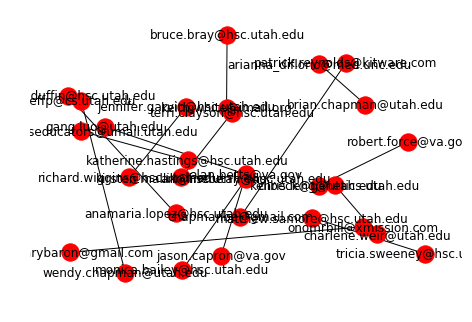

In [37]:
import random
edges = list(main_email.edges(data=True))
random.shuffle(edges)

g2 = nx.MultiGraph()
g2.add_edges_from(edges[:15])
nx.draw_random(g2, with_labels=True)

### Drawing with [graphviz](http://www.graphviz.org/Documentation.php)

NetworkX has an interface to [graphviz](http://www.graphviz.org/Documentation.php) an elegant graph visualization package developed by AT&T

You will probaby need to install ``pydotplus``. There might be challenges for Windows users getting graphviz installed.

In [24]:
#!pip install pydotplus

In [39]:
#ag = nx.to_pydot(nx.star_graph(5))
ag = nx.nx_pydot.to_pydot(g2)
ag.write_png(os.path.join(DATADIR,"mainMail%04d.png"%10))

True

### We can Use IPython to draw the figure 

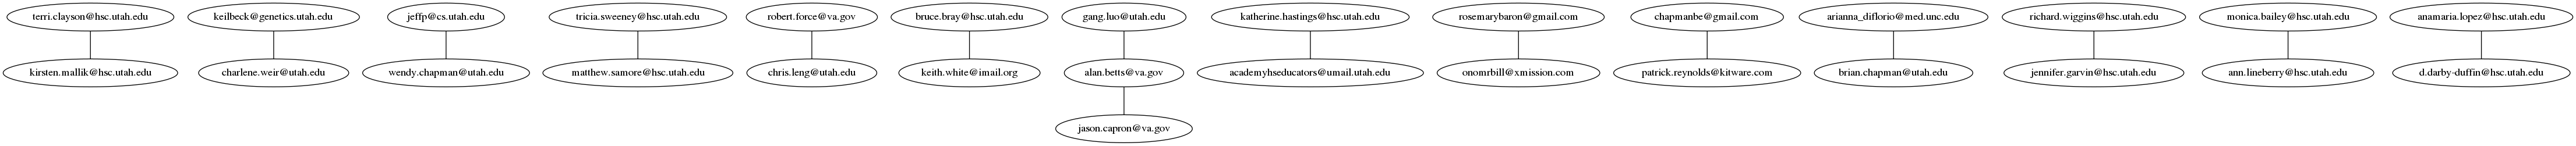

In [40]:

Image(filename=(os.path.join(DATADIR,"mainMail%04d.png"%10)))